In [1]:
from tools_functions import *
import pickle 
import matplotlib.pyplot as plt
import datetime as dt
import sys
sys.path.insert(0,'/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/')
from weigh_predictor import *

In [6]:
alldates = find_dates_between('2017-06-12', dt.datetime.now().strftime('%Y-%m-%d'))
print(len(alldates))
alldates[258]

2584


'2018-02-25'

In [7]:
log = pickle.load(open('firepoint/raster/2x2/departement-01-ainrasterScale0.pkl', 'rb'))
regions = gpd.read_file('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/regions/regions.geojson')
ain = regions[regions['departement'] == 'Ain']
print(log.shape)
plt.imshow(log[0, :,:])
ain.plot(column='scale0')

DriverError: Failed to read GeoJSON data

143


/home/caron/Bureau/.conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


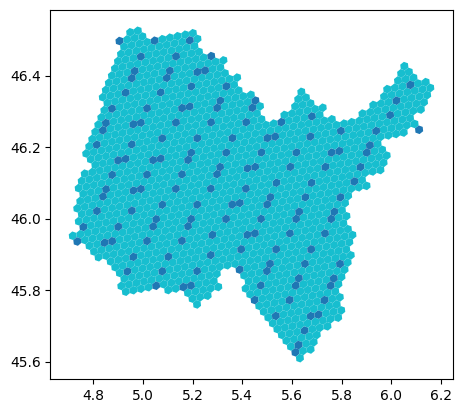

In [ ]:
values = ain.scale0.values
nofound = values[~np.isin(values, log)]
ain['isFound'] = True
ain.loc[ain[ain['scale0'].isin(nofound)].index, 'isFound'] = False
ain.plot(column='isFound')
print(len(ain[~ain['isFound']]))

[]


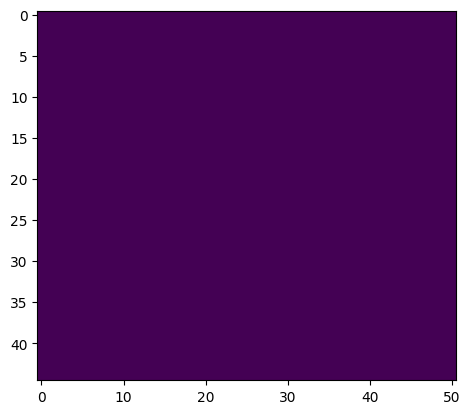

In [90]:
cls = np.unique(log)
toMany = []
sh = []
for c in cls:
    mask = np.argwhere(log == c)
    if mask.shape[0] > 1:
        toMany.append(c)
        sh.append(mask.shape[0])
toMany = np.asarray(toMany)
print(np.unique(sh))
plt.imshow(np.isin(log, toMany)[0])

(45, 51, 2574)


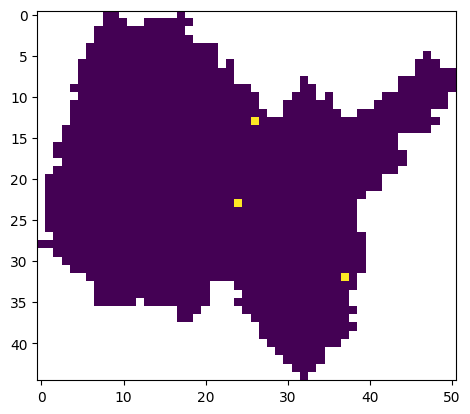

In [31]:
log = pickle.load(open('firepoint/bin/2x2/departement-01-ainbinScale0.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,260])

(45, 51, 2574)


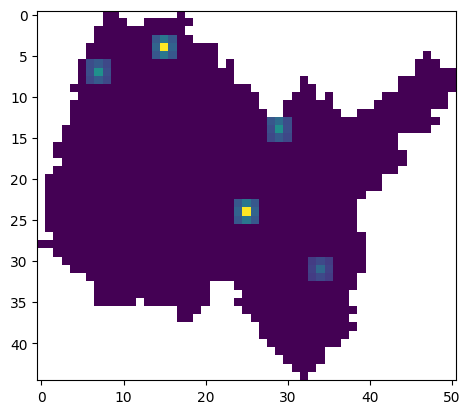

In [38]:
log = pickle.load(open('firepoint/log/2x2/departement-01-ainpastInfluence.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])

1.0
(3, 3, 11)


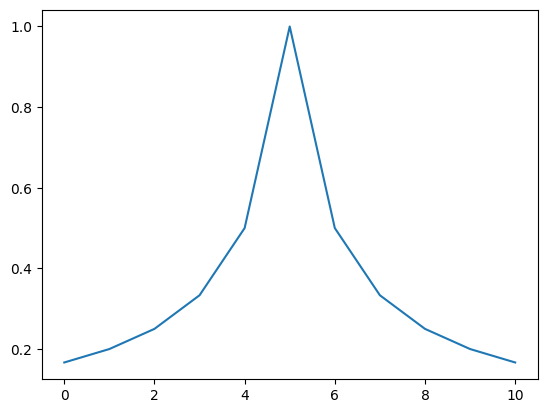

In [22]:
from tools_functions import *
dim = (3,3,11)
n_pixel_x = 0.02875215641173088
n_pixel_y = 0.020721094073767096

resolution_altitude = np.linspace((11//2) + 1, 0, num=(dim[-1] // 2) + 1)[0] - np.linspace((11//2) + 1, 0, num=(dim[-1] // 2) + 1)[1]
kernel = myFunctionDistanceDugrandCercle3D(dim, resolution_lon=n_pixel_x, resolution_lat=n_pixel_y, resolution_altitude=resolution_altitude) + resolution_altitude

kernel = resolution_altitude / kernel

kernel = np.flip(kernel, axis=0)
print(np.max(kernel))
#kernel = kernel / np.max(kernel)
#kernel[:,:,:(dim[2]//2)] = 0.0
print(kernel.shape)
plt.plot(kernel[1,1])

In [20]:
print(kernel[:, :, 2])

[[0.43222453 0.56560227 0.43222453]
 [0.48409788 1.         0.48409788]
 [0.43222453 0.56560227 0.43222453]]


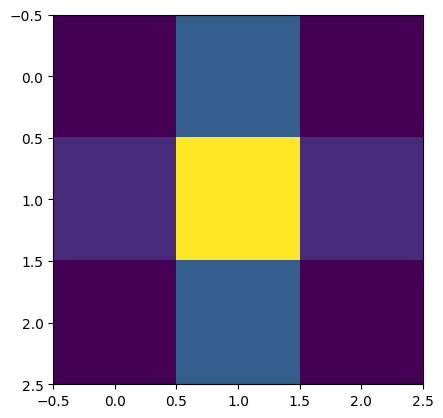

In [21]:
plt.imshow(kernel[:, :, 1])

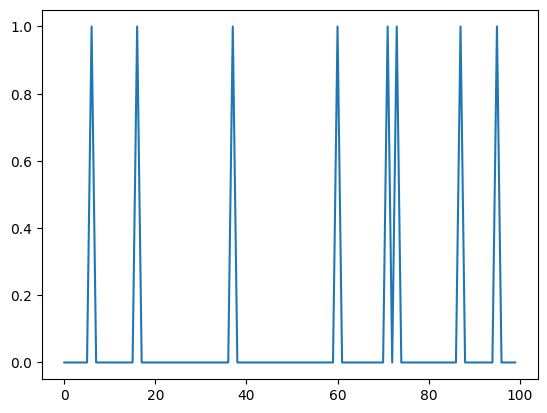

In [159]:
import random
np.random.seed(42)
random.seed(42)
test = np.zeros(100)
test[np.round(np.random.rand(10) * 100).astype(int)] = 1
plt.plot(test)

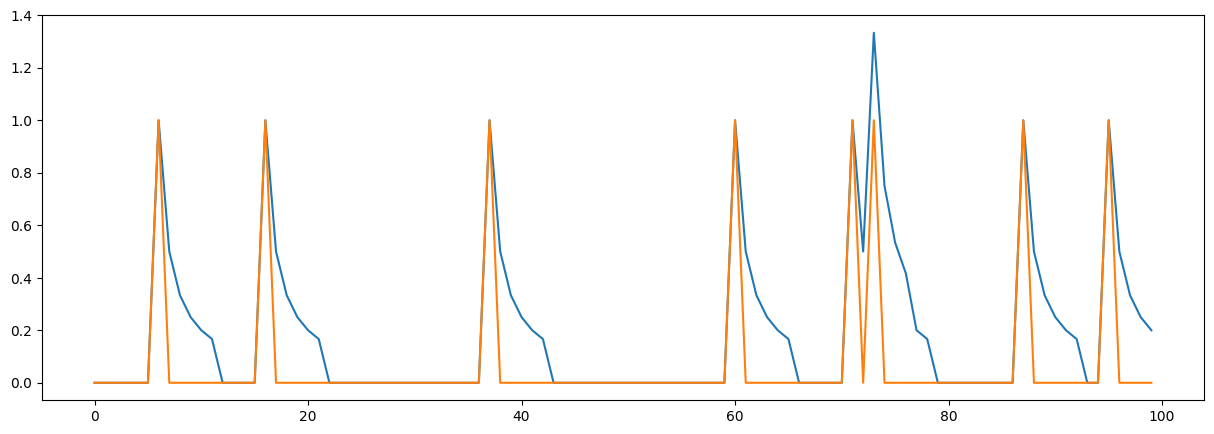

In [161]:
from astropy.convolution import convolve, convolve_fft
res = convolve_fft(test, kernel, normalize_kernel=False, mask=None)
plt.figure(figsize=(15,5))
plt.plot(res)
plt.plot(test)

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

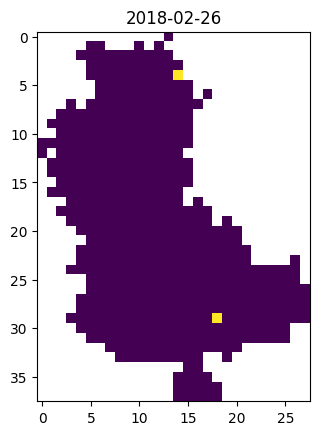

In [33]:
log = pickle.load(open('firepoint/bin/2x2/departement-69-rhonebinScale0.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

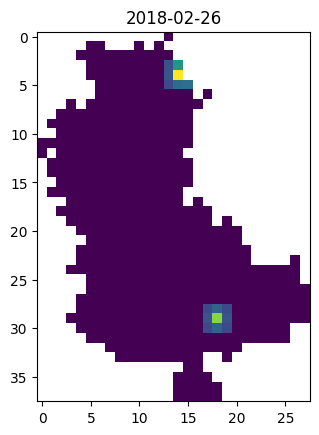

In [39]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneInfluence.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

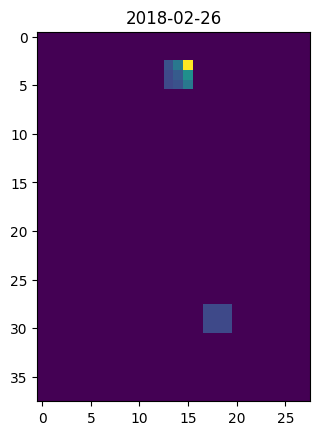

In [35]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneSeason.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)
[0.         0.14285714 0.28571429 0.42857143        nan]


Text(0.5, 1.0, '2018-02-26')

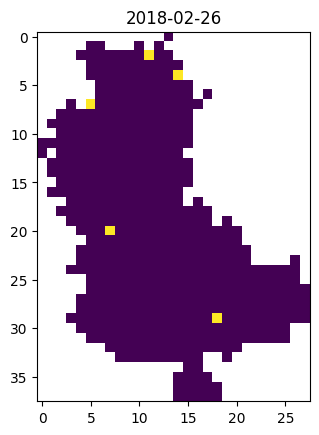

In [26]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneHistorical.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
print(np.unique(log))
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

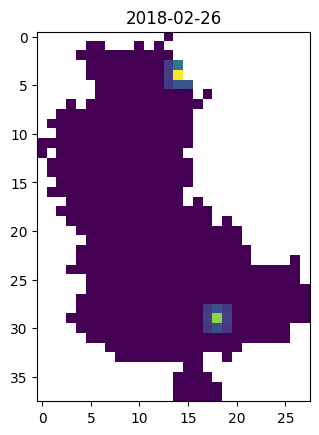

In [23]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneDaily.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

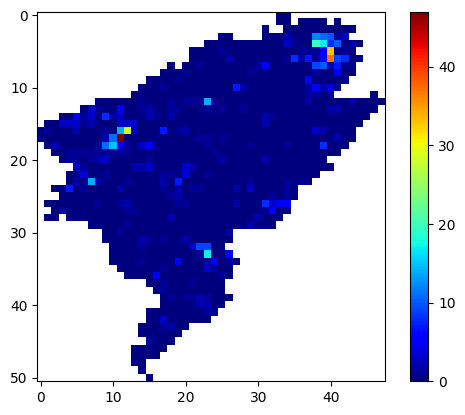

In [2]:
sinister = 'inondation'
departement = 'departement-25-doubs'
mask = read_object(departement+'rasterScale0.pkl', Path(sinister + '/raster'))
values = read_object(departement+'Influence.pkl', Path(sinister + '/log'))
binValues = read_object(departement+'binScale0.pkl', Path(sinister + '/bin'))

valuesSum = np.nansum(binValues, axis=2)
valuesSum[np.isnan(values[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

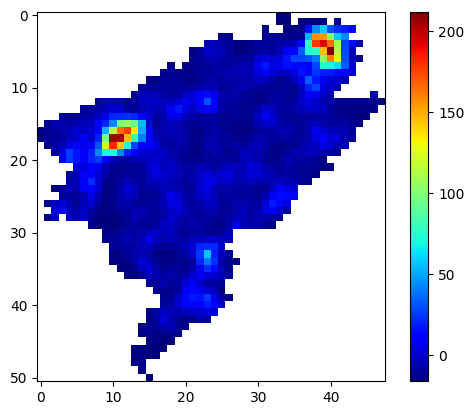

In [25]:
sinister = 'firepoint'
departement = 'departement-25-doubs'
mask = read_object(departement+'rasterScale0.pkl', Path(sinister + '/raster/2x2'))
values = read_object(departement+'Influence.pkl', Path(sinister + '/log/2x2'))
binValues = read_object(departement+'binScale0.pkl', Path(sinister + '/bin/2x2'))

valuesSum = np.nansum(values, axis=2)
valuesSum[np.isnan(values[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

In [79]:
def order_class(predictor, pred):
    res = np.zeros(pred[~np.isnan(pred)].shape[0], dtype=int)
    cc = predictor.cluster_centers.reshape(-1)
    classes = np.arange(cc.shape[0])
    ind = np.lexsort([cc])
    cc = cc[ind]
    classes = classes[ind]
    for c in range(cc.shape[0]):
        mask = np.argwhere(pred == classes[c])
        res[mask] = c
    return res

def check_class(influence, bin):
    values = influence[~np.isnan(influence)]
    binValues_ = bin[~np.isnan(influence)]
    predictor = Predictor(5, name='test')
    predictor.fit(np.unique(values))
    classs = order_class(predictor, predictor.predict(values))
    predictor.log()
    cls = np.unique(classs)
    for cl in cls:
        mask = classs == cl
        print(f'class {cl}, {np.nanmean(binValues_[mask]), np.nanmean(values[mask]), np.nansum(binValues_[mask])}')

check_class(values, binValues)

############# Predictor test ###############
Histogram
[202 420 383 327  55]
Cluster Centers
[[1.82267822]
 [0.82845714]
 [0.39669029]
 [1.28638906]
 [2.7358    ]]
####################################
class 0, (0.0, 0.008259768394366332, 0.0)
class 1, (0.25615972812234494, 0.8174594307561598, 1206.0)
class 2, (0.6312594840667678, 1.2509575113808802, 832.0)
class 3, (0.7137809187279152, 1.8003780918727914, 202.0)
class 4, (1.25, 2.716616666666667, 75.0)


In [80]:
np.nansum(binValues)

2315.0